In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [2]:
Loan_ = pd.read_csv("loan.csv" , low_memory = False)

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
Loan_.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
print(Loan_.shape)

(39717, 111)


# Cleaning Section

In [5]:
# number of null value in each column
Loan_.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
LColumns = np.array(Loan_.columns)
round(100*(Loan_.isnull().sum())/len(Loan_.index),2)
LColumns = np.array(Loan_.columns)##LColumns is an array collecting the names of columns of Loan_ dataFrame

In [7]:
#remove those columns which have more than 30000
for i in range(Loan_.shape[1]):
    if (Loan_[LColumns[i]].isnull().sum() >30000):
        Loan_.drop([LColumns[i]],axis=1,inplace=True)

In [8]:
print(Loan_.shape)
round(100*(Loan_.isnull().sum())/len(Loan_.index),2)

(39717, 55)


id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
#remove un necessary columns
Loan_ = Loan_.drop(['emp_title','desc','mths_since_last_delinq',],axis=1)

In [10]:
Loan_.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
#there are very few rows which have one null values so we remvoe that column
Loan_ =Loan_.loc[Loan_.isnull().sum(axis=1)<1]

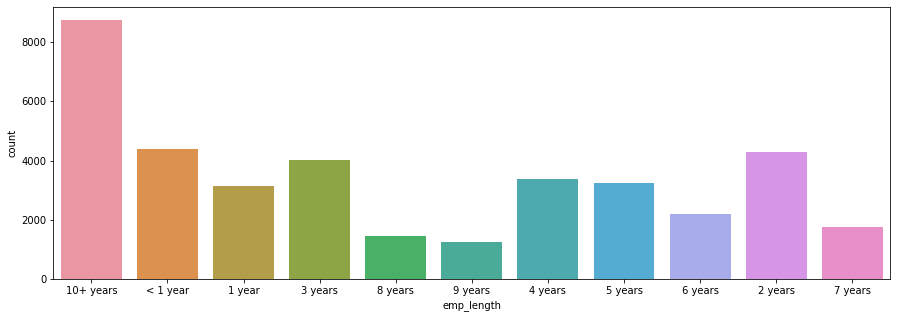

In [12]:
plt.figure(figsize = (15,5))
sns.countplot(Loan_['emp_length'])

## Filling all Null values on the basis of their respective columns

In [13]:
Loan_['emp_length'].fillna("10 Years" , inplace = True)
Loan_['revol_util'] =Loan_['revol_util'].str.strip("%")
Loan_['revol_util'] = Loan_['revol_util'].astype("float")

In [14]:
Loan_['revol_util'].median()
Loan_['revol_util'].fillna(Loan_['revol_util'].median() , inplace = True)

In [15]:
Loan_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37823 entries, 0 to 39623
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37823 non-null  int64  
 1   member_id                   37823 non-null  int64  
 2   loan_amnt                   37823 non-null  int64  
 3   funded_amnt                 37823 non-null  int64  
 4   funded_amnt_inv             37823 non-null  float64
 5   term                        37823 non-null  object 
 6   int_rate                    37823 non-null  object 
 7   installment                 37823 non-null  float64
 8   grade                       37823 non-null  object 
 9   sub_grade                   37823 non-null  object 
 10  emp_length                  37823 non-null  object 
 11  home_ownership              37823 non-null  object 
 12  annual_inc                  37823 non-null  float64
 13  verification_status         378

In [16]:
 Loan_['last_pymnt_d'].fillna("May-16" , inplace = True)

In [17]:
Loan_['collections_12_mths_ex_med'].fillna(0.0 , inplace = True)

In [18]:
Loan_['pub_rec_bankruptcies'].fillna(0.0 , inplace=True)

In [19]:
Loan_['chargeoff_within_12_mths'].fillna(0.0 , inplace =True)

In [20]:
Loan_ = Loan_.drop('tax_liens' ,axis=1)

In [21]:
Loan_ =Loan_.loc[Loan_.isnull().sum(axis=1)<1]

In [22]:
#percentage of NUll values in each columns now we see that there is no NULL value
round(100*(Loan_.isnull().sum())/len(Loan_.index),2)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util    

In [23]:
Loan_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37823 entries, 0 to 39623
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37823 non-null  int64  
 1   member_id                   37823 non-null  int64  
 2   loan_amnt                   37823 non-null  int64  
 3   funded_amnt                 37823 non-null  int64  
 4   funded_amnt_inv             37823 non-null  float64
 5   term                        37823 non-null  object 
 6   int_rate                    37823 non-null  object 
 7   installment                 37823 non-null  float64
 8   grade                       37823 non-null  object 
 9   sub_grade                   37823 non-null  object 
 10  emp_length                  37823 non-null  object 
 11  home_ownership              37823 non-null  object 
 12  annual_inc                  37823 non-null  float64
 13  verification_status         378

In [24]:
Loan_.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


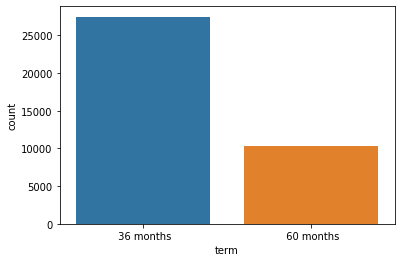

In [25]:
sns.countplot(Loan_['term'])## plot the count of terms

(37823, 51)

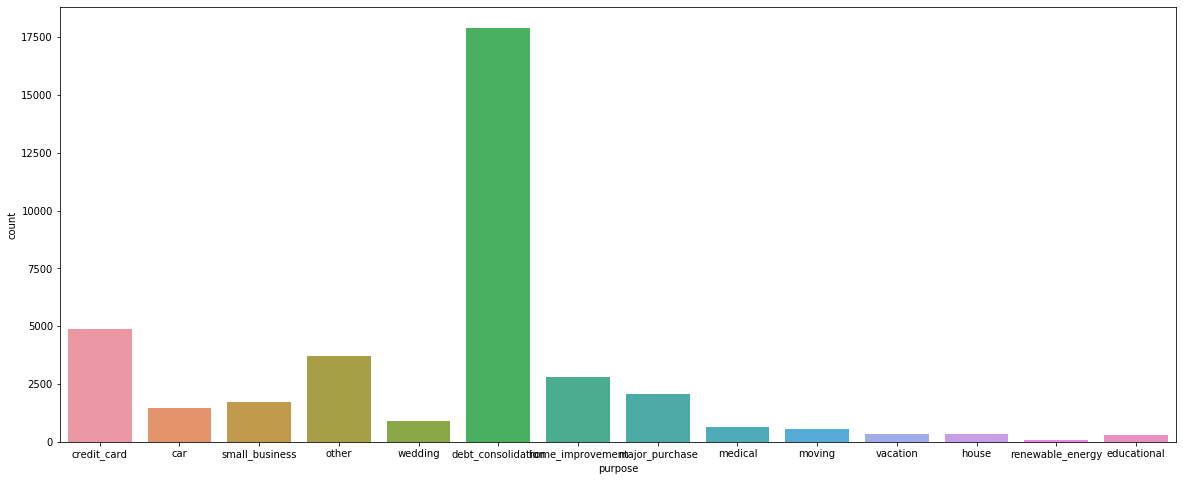

In [26]:
#In this plot we see the count of each category in purpose column and found that debt consolidation has maximum count
plt.figure(figsize=(20,8))
sns.countplot(Loan_['purpose'])
Loan_.shape

In [27]:
Loan_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37823 entries, 0 to 39623
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37823 non-null  int64  
 1   member_id                   37823 non-null  int64  
 2   loan_amnt                   37823 non-null  int64  
 3   funded_amnt                 37823 non-null  int64  
 4   funded_amnt_inv             37823 non-null  float64
 5   term                        37823 non-null  object 
 6   int_rate                    37823 non-null  object 
 7   installment                 37823 non-null  float64
 8   grade                       37823 non-null  object 
 9   sub_grade                   37823 non-null  object 
 10  emp_length                  37823 non-null  object 
 11  home_ownership              37823 non-null  object 
 12  annual_inc                  37823 non-null  float64
 13  verification_status         378

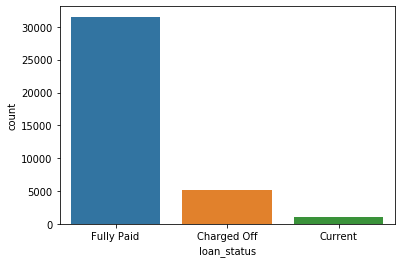

In [28]:
sns.countplot(Loan_['loan_status'])

In [29]:
%%markdown
## Derived Meterices

## Derived Meterices


In [30]:
Loan_['issue_d'] = Loan_['issue_d'].str.split("-")
Loan_['issueMonth'] =Loan_['issue_d'].apply(lambda x: x[0])
Loan_['issueDay'] =Loan_['issue_d'].apply(lambda x: x[1]  )
Loan_.drop('issue_d',axis=1,inplace=True)
Loan_.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issueMonth,issueDay
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11


In [31]:
%%markdown
## UNIVARIATE ANALYSIS

## UNIVARIATE ANALYSIS


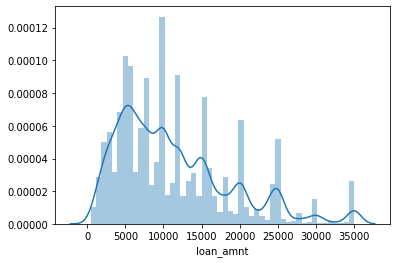

In [32]:
sns.distplot(Loan_['loan_amnt'])

## here in this distribution we find that most of the loan amount range are from 5k to 25k rupees

count    3.782300e+04
mean     6.967727e+04
std      6.365142e+04
min      4.000000e+03
25%      4.190200e+04
50%      6.000000e+04
75%      8.355000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

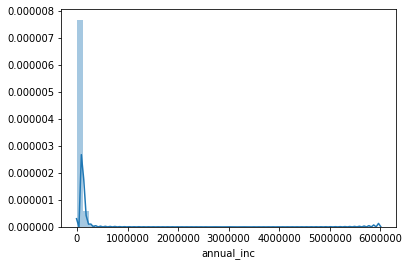

In [33]:
sns.distplot(Loan_['annual_inc'])
Loan_['annual_inc'].describe()


## In the distribution of annual income most people have salary less than 1 million per annum very few have salary greater then 1 million so we remove those columns which are greater than 1 million  and plot again


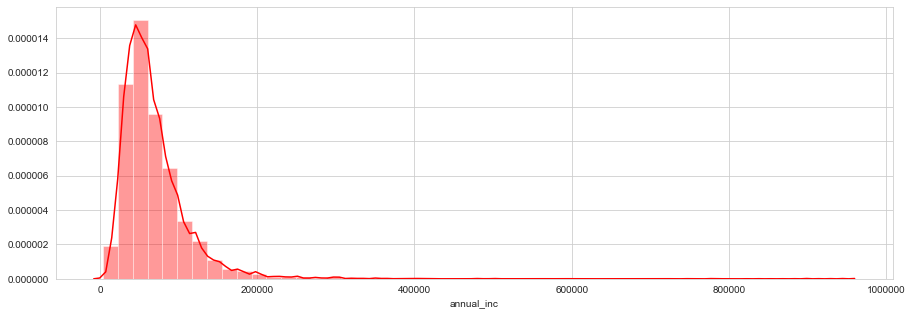

In [34]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
Loan_['annual_inc'] = Loan_['annual_inc'].loc[Loan_['annual_inc'] < 1000000]
sns.distplot(Loan_['annual_inc'],color='r')


In [35]:
Loan_.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issueMonth,issueDay
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11


## In the plot  we ditribution of loan amount in each category of loan status and in next column with verfication status respectivly 

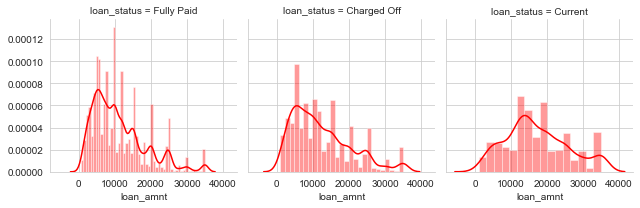

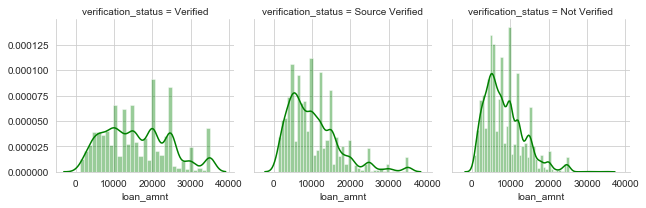

In [36]:
g=sns.FacetGrid(Loan_ , col= 'loan_status')
y=sns.FacetGrid(Loan_ , col= 'verification_status')
g=g.map(sns.distplot , "loan_amnt",color='r')
y=y.map(sns.distplot , "loan_amnt",color='green')

### In the below plot we observe that people with high risk (g grade) are much found whose salary range below 2 lakh per annum rupees

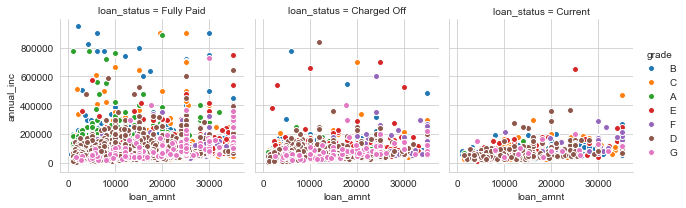

In [37]:
g = sns.FacetGrid(Loan_, col="loan_status",  hue="grade")
g = (g.map(plt.scatter, "loan_amnt", "annual_inc", edgecolor="w").add_legend())

## In below plot we observe that most loan are taken for the purpose of debt_consolidation and most them are already paid

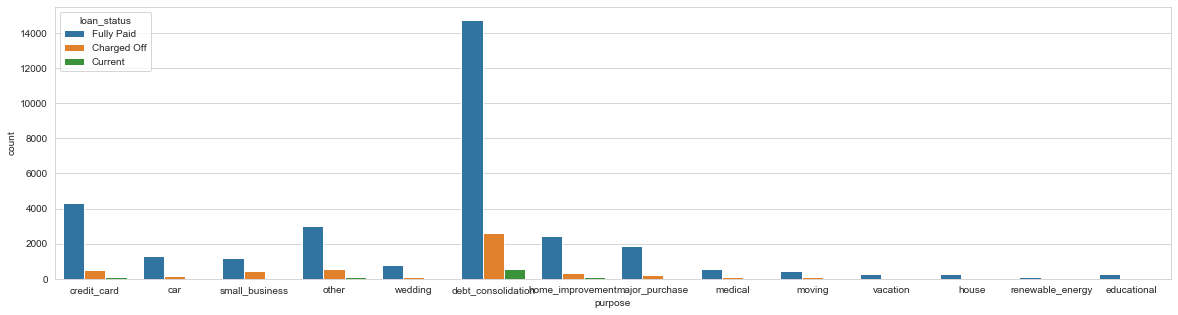

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x='purpose' , hue='loan_status' , data=Loan_)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issueMonth,issueDay
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11


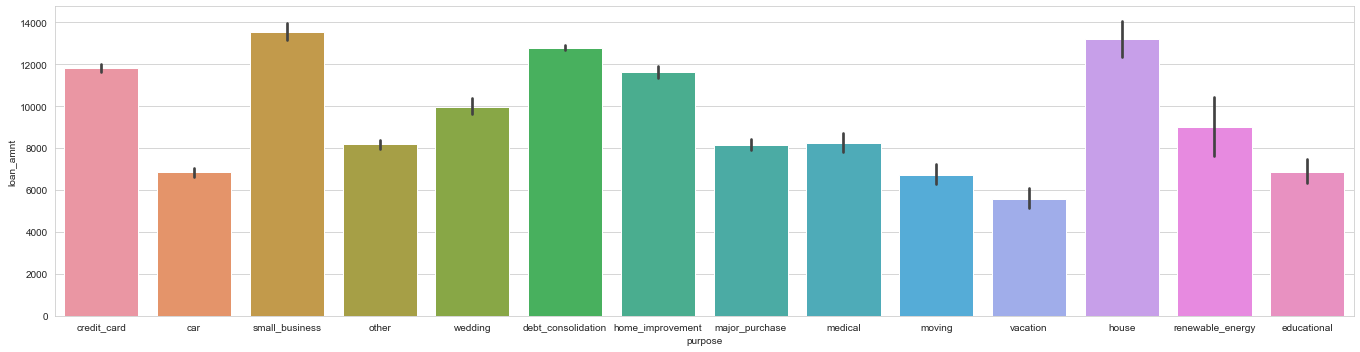

In [39]:
plt.figure(figsize=(19,5))

sns.barplot(x='purpose' , y = 'loan_amnt' ,data=Loan_)
plt.tight_layout()
Loan_.head()

In [40]:
Loan_['int_rate'] = Loan_['int_rate'].str.split("%")
Loan_['int_rate'] = Loan_['int_rate'].apply(lambda x : x[0])
Loan_['int_rate'] = Loan_['int_rate'].astype("float64")

## In the below plot we plot the distrbution of interest rate and foun that most of the interest rate are found between 10 to 15 percent

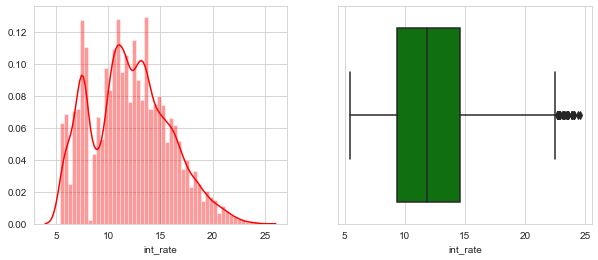

In [41]:
f, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
sns.distplot(Loan_['int_rate'],color='r',ax=axes[0])
sns.boxplot(Loan_['int_rate'],color ='g',ax=axes[1])

In [42]:
Loan_['term'] = Loan_['term'].str.split(" ")
Loan_['term'] = Loan_['term'].apply(lambda x : x[1])

In [43]:
Loan_['term'] = Loan_['term'].astype("int64")
Loan_.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issueMonth,issueDay
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11


## In the below plot we plot the loan amount with respect to grade and found that people have f grade are taken more loan amount in which most of them are in current state

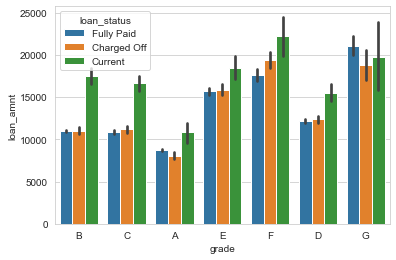

In [44]:
sns.barplot(hue='loan_status' , x = 'grade' ,y='loan_amnt' ,data = Loan_)

In [45]:
Loan_['emp_length'].value_counts()

10+ years    8749
< 1 year     4396
2 years      4291
3 years      4023
4 years      3375
5 years      3233
1 year       3132
6 years      2192
7 years      1746
8 years      1449
9 years      1237
Name: emp_length, dtype: int64

## In the below plot we plot the loan amount with respect to employment length and found that people have more than 10 years work are taken more loan amount in which most of them are in current state

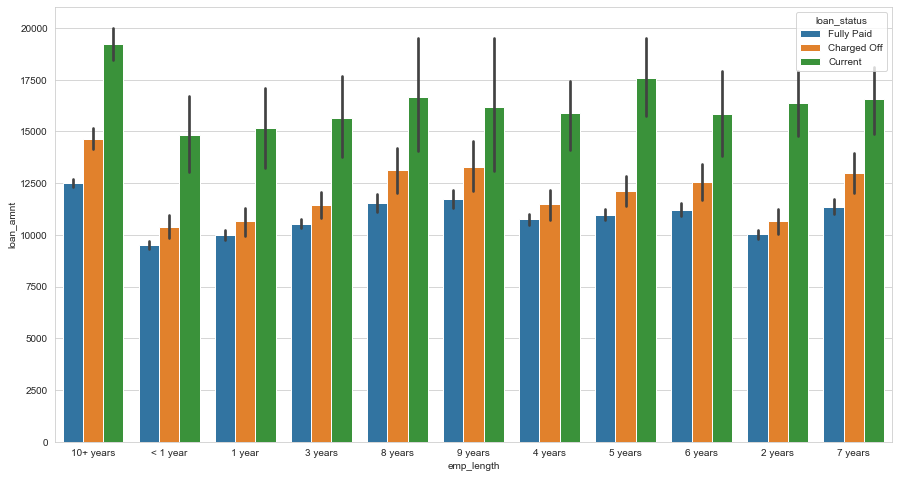

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(hue='loan_status' , x = 'emp_length' ,y='loan_amnt' ,data = Loan_)

RENT        18026
MORTGAGE    16933
OWN          2768
OTHER          96
Name: home_ownership, dtype: int64

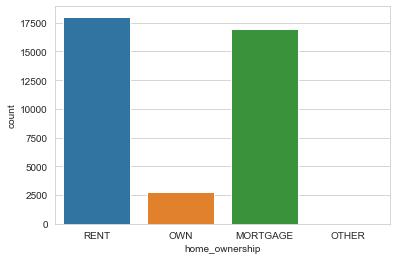

In [47]:
## here we plot count of each category of home ownership
sns.countplot(Loan_['home_ownership'])
Loan_['home_ownership'].value_counts()

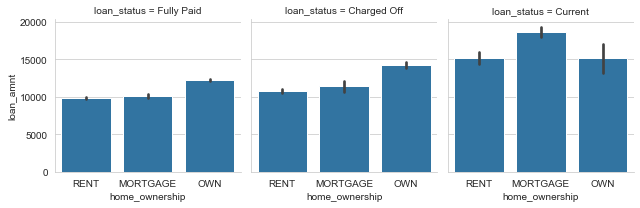

In [48]:
import warnings
warnings.filterwarnings("ignore")
g = sns.FacetGrid(Loan_ , col = 'loan_status')
g = g.map(sns.barplot , 'home_ownership' , 'loan_amnt')

## In the below plot we plot the loan amount  and annual income with respect to  home ownership found that people who live in MORTAGE have high annual income as well as high loan amount taken

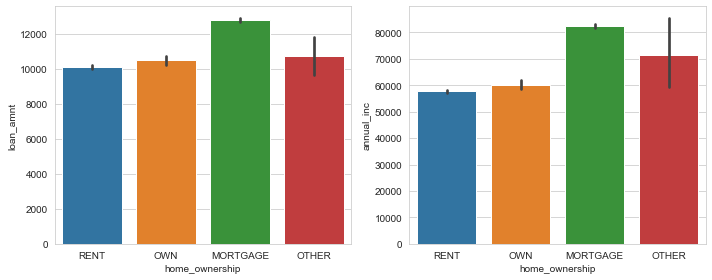

In [49]:
f, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
sns.barplot(x='home_ownership' , y='annual_inc',data = Loan_,ax=axes[1])
sns.barplot(x='home_ownership' , y='loan_amnt',data = Loan_,ax=axes[0])
plt.tight_layout()

In [50]:
Loan_.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issueMonth,issueDay
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11


In [51]:
%%markdown
## Bivariate Analysis

## Bivariate Analysis


In [52]:
Loan_.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issueMonth,issueDay
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Dec,11


## In the below scatter plot we find co relation between loan amount and annual income and observe that people who salary below 2 lakhs are taken loan more

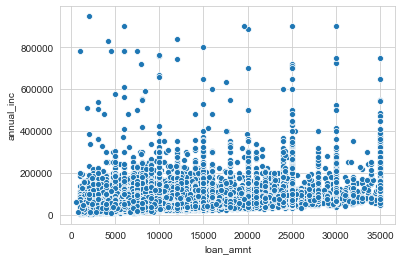

In [53]:
import seaborn as sns
Loan_['annual_inc'] = Loan_['annual_inc'].loc[Loan_['annual_inc'] < 1000000]
sns.scatterplot(x="loan_amnt",y="annual_inc",data=Loan_)

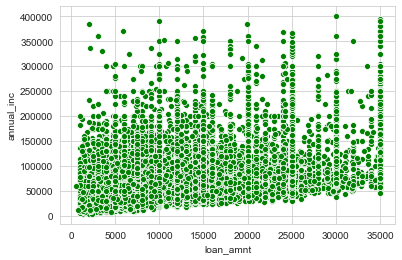

In [54]:
##here we remove some rows whose annual income less than 4lakh becoz ver few have greaer  than 4 lakh
Loan_['annual_inc'] = Loan_['annual_inc'].loc[Loan_['annual_inc'] < 400000]
sns.scatterplot(x="loan_amnt",y="annual_inc",data=Loan_,color='green')


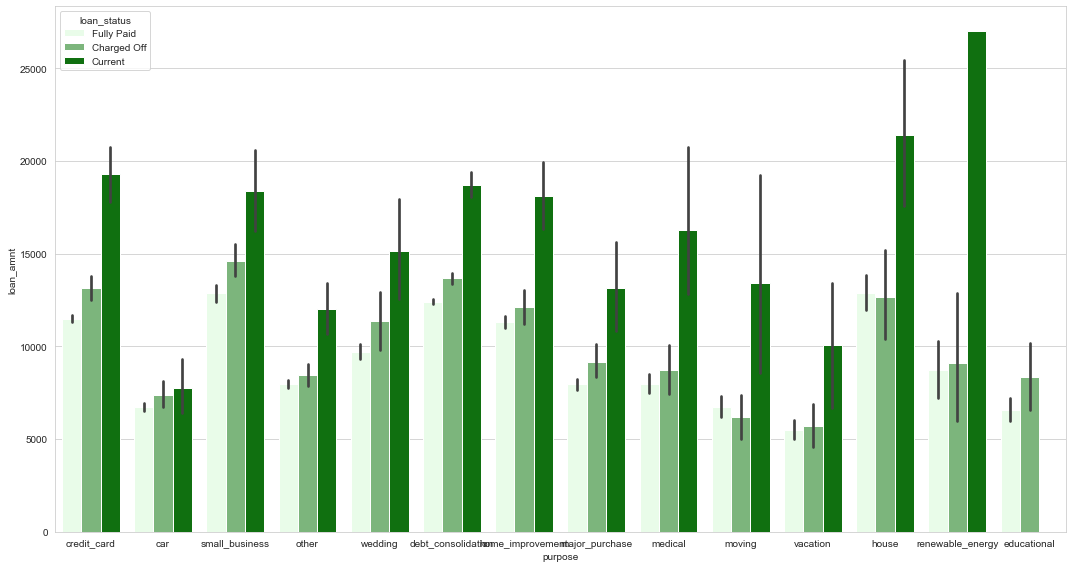

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x='purpose' , y = 'loan_amnt' , hue='loan_status',color='g',data=Loan_)
plt.tight_layout()

In [56]:
Loan_.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'issueMonth', 'issueDay'],
      dtype='object')

### Here we drop some un necessary columns which are not good for our target column loan_status

In [57]:
Loan_ = Loan_.drop(['delinq_amnt','pub_rec_bankruptcies','dti', 'delinq_2yrs','total_rec_late_fee','collection_recovery_fee'
                 ,'last_credit_pull_d','collections_12_mths_ex_med'],axis=1)
Loan_ = Loan_.drop(['url','zip_code'],axis=1)

In [58]:
Loan_.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,issueMonth,issueDay
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,Jan-15,171.62,1,INDIVIDUAL,0,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,117.08,Apr-13,119.66,1,INDIVIDUAL,0,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,Jun-14,649.91,1,INDIVIDUAL,0,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,0.00,Jan-15,357.48,1,INDIVIDUAL,0,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,May-16,67.79,1,INDIVIDUAL,0,0.0,Dec,11


## Here we find out the correlation between columns and remove those columns which have less correalation

In [59]:
corr_amnt=pd.DataFrame(Loan_.corrwith(Loan_['loan_amnt']),columns=['correlation']).sort_values(by='correlation',ascending=False)

In [60]:
corr_amnt = corr_amnt.loc[corr_amnt['correlation']<0.2]


In [61]:
corr_amnt.index

Index(['out_prncp', 'out_prncp_inv', 'open_acc', 'id', 'member_id',
       'recoveries', 'revol_util', 'inq_last_6mths', 'pub_rec'],
      dtype='object')

In [62]:
Loan_ = Loan_.drop(['out_prncp', 'out_prncp_inv', 'open_acc', 'id', 'member_id',
       'recoveries', 'revol_util', 'inq_last_6mths', 'pub_rec'],axis=1)

In [63]:
Loan_.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,revol_bal,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,issueMonth,issueDay
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,Jan-85,13648,9,f,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,1,INDIVIDUAL,0,0.0,Dec,11
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,Apr-99,1687,4,f,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,1,INDIVIDUAL,0,0.0,Dec,11
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,Nov-01,2956,10,f,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,1,INDIVIDUAL,0,0.0,Dec,11
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,Feb-96,5598,37,f,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,1,INDIVIDUAL,0,0.0,Dec,11
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,Jan-96,27783,38,f,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,1,INDIVIDUAL,0,0.0,Dec,11


## As we see that Loan_amnt and the funded amount and funded amount Investment are approx same co-relation so we can remove two extra columns

In [64]:
Loan_ = Loan_.drop(['funded_amnt','funded_amnt_inv'],axis=1)
Loan_ = Loan_.drop(['acc_now_delinq','chargeoff_within_12_mths'],axis=1)
Loan_ = Loan_.drop(['policy_code','initial_list_status','pymnt_plan'],axis=1)


In [65]:
Loan_.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,earliest_cr_line,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,application_type,issueMonth,issueDay
0,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,Jan-85,13648,9,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,INDIVIDUAL,Dec,11
1,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,Apr-99,1687,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,INDIVIDUAL,Dec,11
2,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,IL,Nov-01,2956,10,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,INDIVIDUAL,Dec,11
3,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,Feb-96,5598,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,INDIVIDUAL,Dec,11
4,3000,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,Personal,OR,Jan-96,27783,38,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,INDIVIDUAL,Dec,11


## In the below boxplot we trying to find out the distribution of loan amount on the basis of home ownership and found  who lives in Rent are taken loan amount very less 

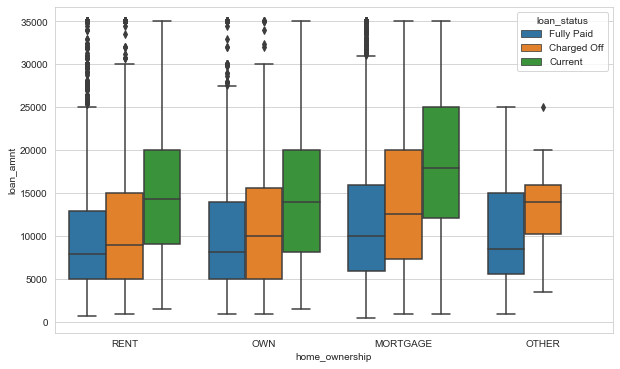

In [66]:
plt.figure(figsize = (10,6))
#sns.boxplot(x='home_ownership' , y = 'loan_amnt' ,data=Loan_)
sns.boxplot(x='home_ownership' , y = 'loan_amnt' , hue='loan_status' , data=Loan_)

## In the below violin plot we plot the loan amount with resepect to purpose of loan and found small business purpose loan are more distributed in a wide range

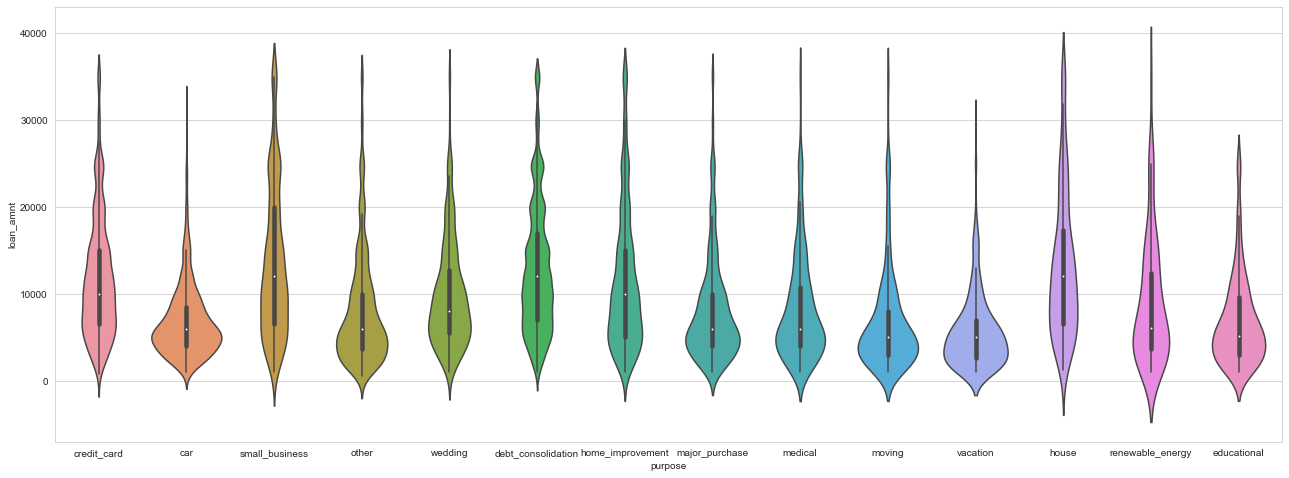

In [67]:
plt.figure(figsize=(22,8))
sns.violinplot(x='purpose' , y = 'loan_amnt' ,data=Loan_)

## In the below heatmap we trying to find out the co-relation of columns

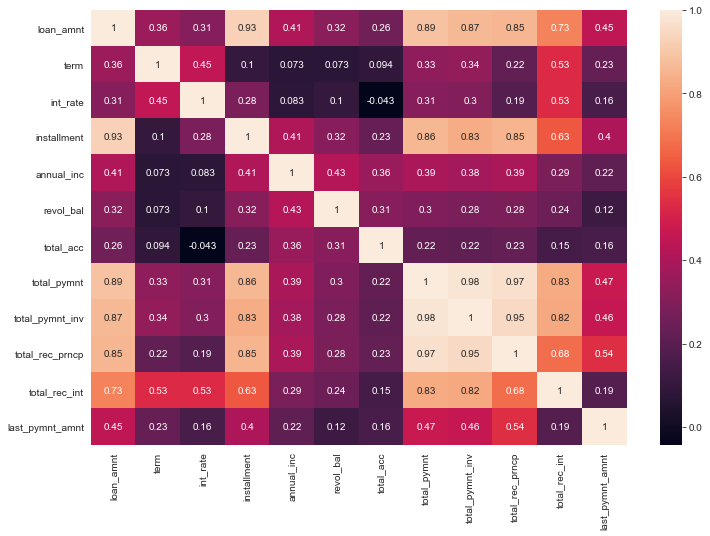

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(Loan_.corr(),color='green',annot=True)

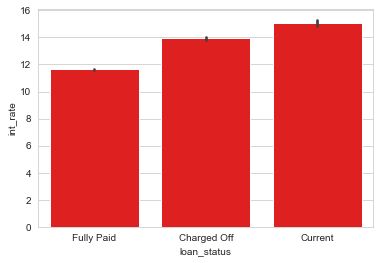

In [69]:
sns.barplot(x='loan_status',y='int_rate' ,color='r', data = Loan_)

In [70]:
Loan_.tail(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,earliest_cr_line,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,application_type,issueMonth,issueDay
39475,12000,36,9.01,381.66,B,B2,6 years,MORTGAGE,100671.39,Not Verified,Fully Paid,credit_card,Debt Consolidation,IL,Oct-79,7606,39,12347.219880,745.98,12000.00,347.22,May-08,11202.55,INDIVIDUAL,Dec,07
39551,12375,36,10.91,404.62,C,C3,2 years,RENT,80000.00,Not Verified,Fully Paid,debt_consolidation,no credit cards for me,VA,Dec-00,13126,4,14370.922250,1161.29,12375.00,1995.92,Feb-10,4259.11,INDIVIDUAL,Dec,07
39562,4800,36,10.28,155.52,C,C1,1 year,RENT,35000.00,Not Verified,Fully Paid,debt_consolidation,Want to pay off high intrest cards,VA,Mar-00,5836,12,5134.085288,1176.56,4800.00,334.09,Aug-08,3891.08,INDIVIDUAL,Nov,07
39573,7000,36,10.59,227.82,C,C2,3 years,MORTGAGE,63500.00,Not Verified,Fully Paid,debt_consolidation,Taking the First Step by Consolidating,AZ,Feb-89,14930,21,8174.021910,1167.72,7000.00,1174.02,May-10,1571.29,INDIVIDUAL,Nov,07
39623,9000,36,12.49,301.04,D,D3,8 years,MORTGAGE,39000.00,Not Verified,Charged Off,debt_consolidation,Pay off debt,MD,Aug-97,26233,37,4015.960000,311.64,1496.83,609.26,May-08,301.05,INDIVIDUAL,Oct,07


In [71]:
Loan_.set_index(np.arange(0,Loan_.shape[0]),inplace=True)

### our main aim to determine which borrower have chance to came into Defaulter

In [72]:
def chargeOFF(columns):
    chargeOff = Loan_.loc[Loan_['loan_status'] == "Charged Off"]
    df = chargeOff.groupby(columns)
    d = Loan_.groupby(columns)
    h = pd.DataFrame(df.loan_status.count()/d.loan_status.count())
    plt.figure(figsize = (20,5))
    sns.barplot(y=h['loan_status'] , x = h.index , data = h)
    plt.ylabel("probability of getting defaulter")
    

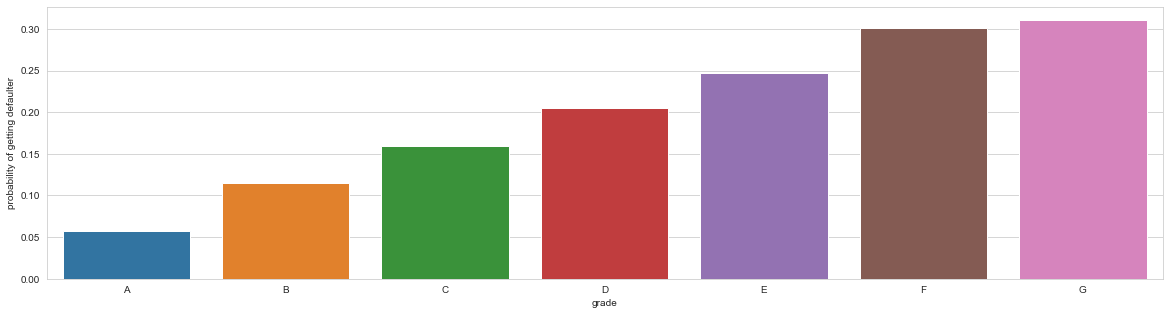

In [73]:
chargeOFF("grade")

## In the above plot we observe that G grade hs 30 percent chance to get as defaulter

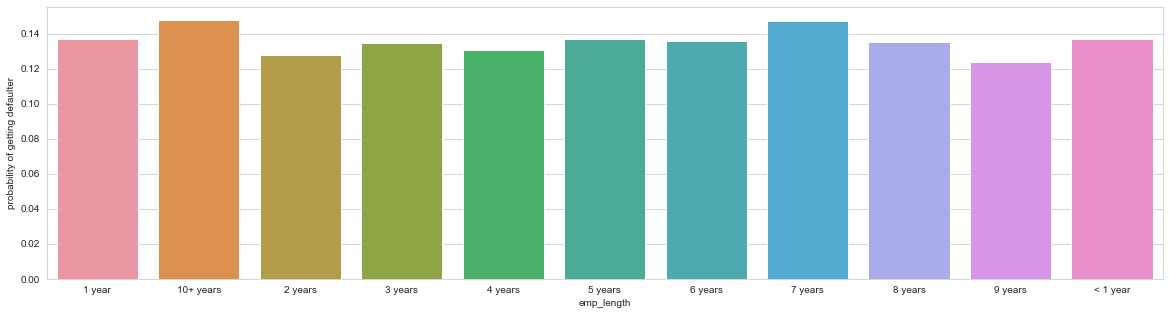

In [74]:
chargeOFF("emp_length")

## In the above plot we observe that  10 years + employment length has 14 percent chance to get as defaulter

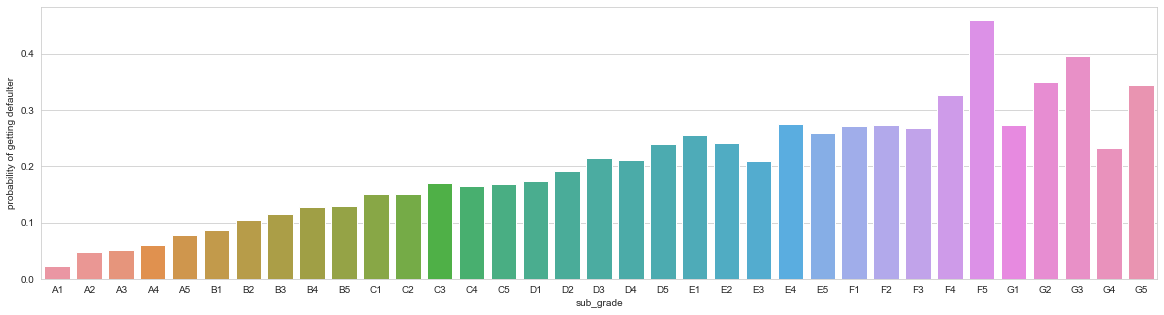

In [75]:
chargeOFF("sub_grade")

## In the above plot we observe that G grade and in G1 subgrade has more than 40 percent  chance to get as defaulter

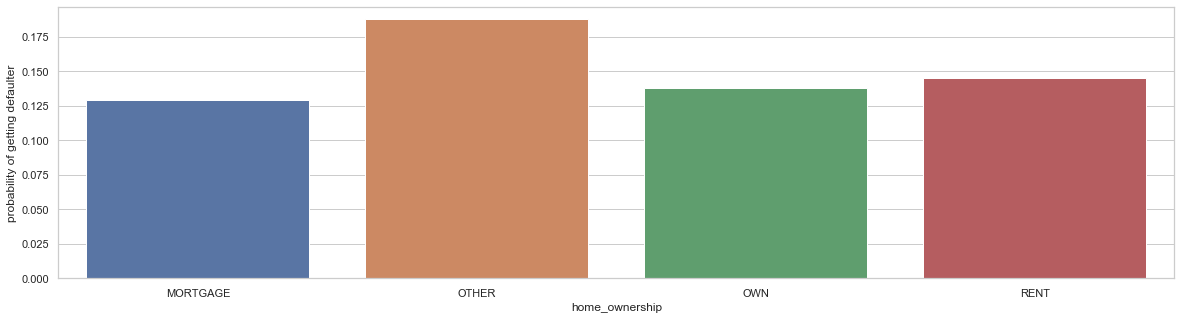

In [561]:
chargeOFF("home_ownership")

## In the above plot we observe that home ownership category in which who are in other has 19 percent chance to get as defaulter

<Figure size 1440x576 with 0 Axes>

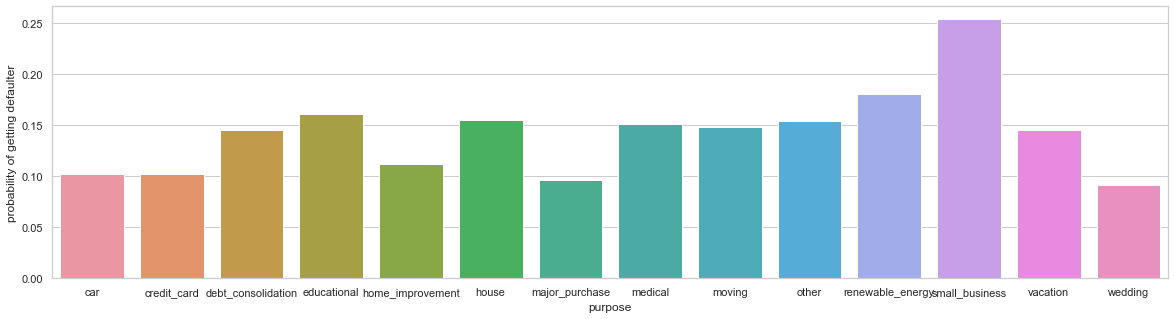

<Figure size 1440x576 with 0 Axes>

In [562]:

chargeOFF("purpose")
plt.figure(figsize=(20,8))

## In the above plot we observe that who are taking loan for  small buisness has more tha 25 percent chance to get as defaulter

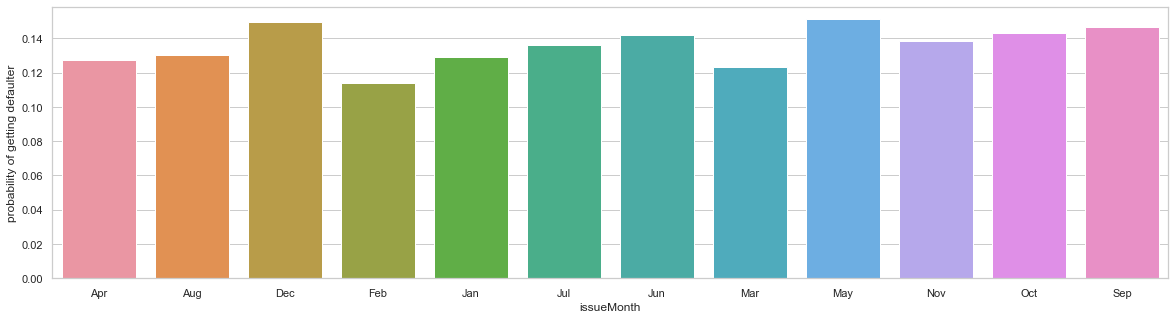

In [563]:
chargeOFF("issueMonth")

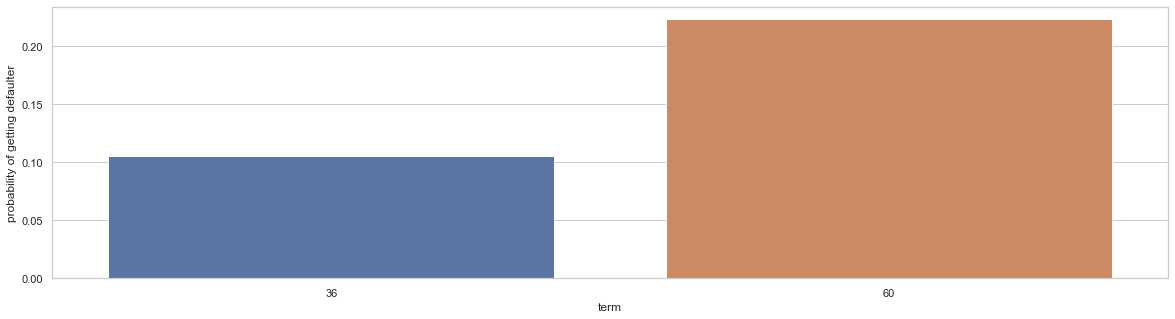

In [564]:
chargeOFF("term")

## In the above plot we observe that  who are taking loan for 60 term has more than 20 percent chance to get as defaulter

In [566]:
## In this we analyse which are going to more like to repay the loan
def FullyPaid(columns):
    full_paid = Loan_.loc[Loan_['loan_status'] == "Fully Paid"]
    df = full_paid.groupby(columns)
    d = Loan_.groupby(columns)
    h = pd.DataFrame(df.loan_status.count()/d.loan_status.count())
    plt.figure(figsize = (15,5))
    sns.barplot(y=h['loan_status'] , x = h.index ,data = h)
    plt.ylabel("probability of who fully paid")
    

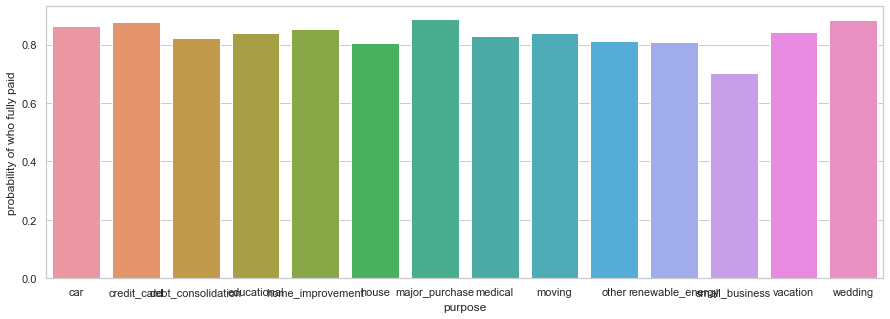

In [567]:
FullyPaid("purpose")

## In above plot people who are taking loan for major purchase are 80 percent chance to repay the loan

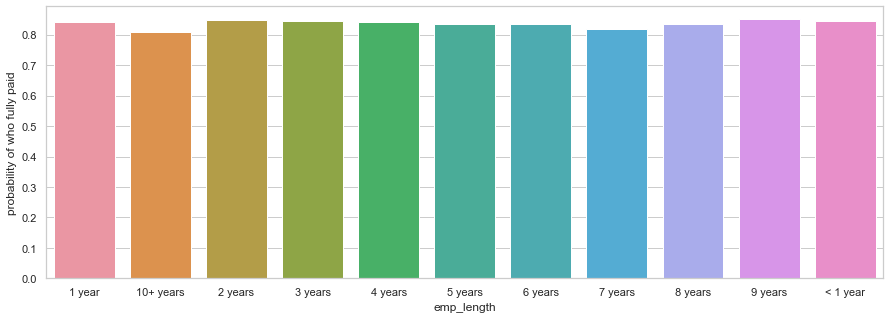

In [568]:
FullyPaid("emp_length")

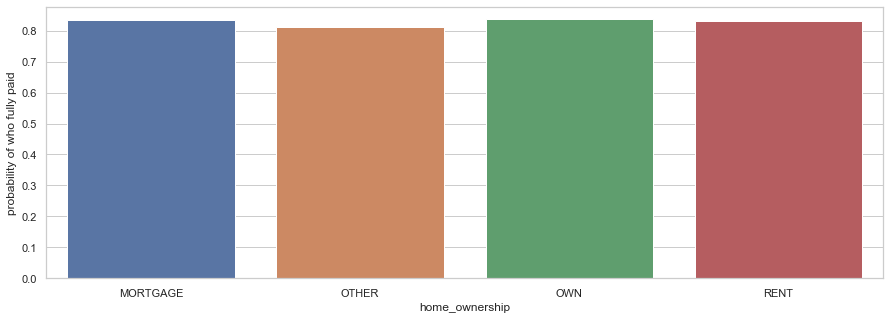

In [569]:
FullyPaid("home_ownership")

## In above plot people who are live in their own house or on rent has 80 percent chance to repay the loan

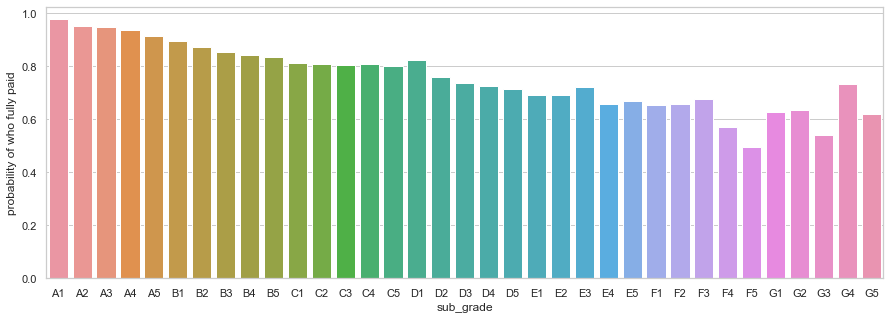

In [570]:
FullyPaid("sub_grade")

## In above plot people who are in the A1 sub grade category are more than 95 percent chance to repay the loan

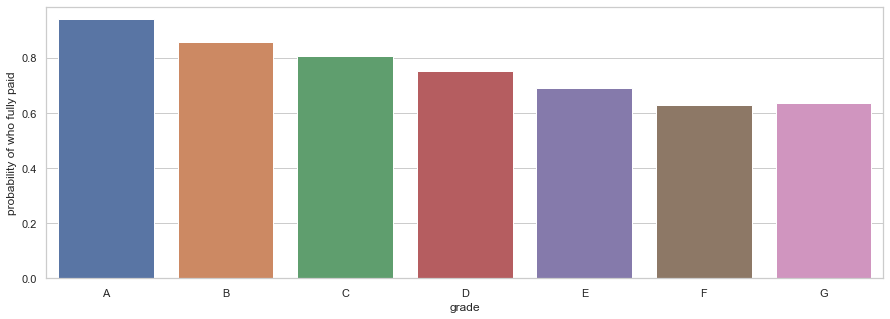

In [571]:
FullyPaid("grade")

## In above plot people who are in the A grade category are more than 85 percent chance to repay the loan

In [572]:
## Now we work on some continuos data who are more likely to repay or came as defaulter
def chargeOFFNum(columns):
    chargeOff = Loan_.loc[Loan_['loan_status'] == "Charged Off"]
    df = chargeOff.groupby(columns)
    d = Loan_.groupby(columns)
    h = pd.DataFrame(df.loan_status.count()/d.loan_status.count())
    plt.figure(figsize = (10,5))
    sns.distplot(h['loan_status'],color='r')
    plt.title("Defaulter")
    plt.xlabel("distribution of Who may default")
    

In [573]:
def FullyPaidNum(columns):
    full_paid = Loan_.loc[Loan_['loan_status'] == "Fully Paid"]
    df = full_paid.groupby(columns)
    d = Loan_.groupby(columns)
    h = pd.DataFrame(df.loan_status.count()/d.loan_status.count())
    plt.figure(figsize = (15,5))
    sns.distplot(h['loan_status'],color='green')
    plt.title("Full Paid")
    plt.xlabel("distribution of full paid")
    

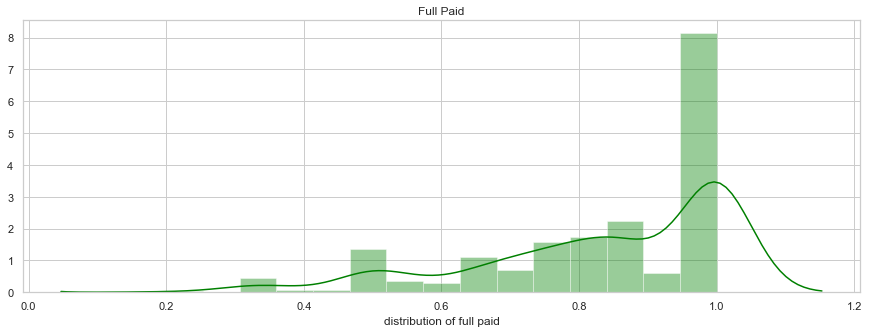

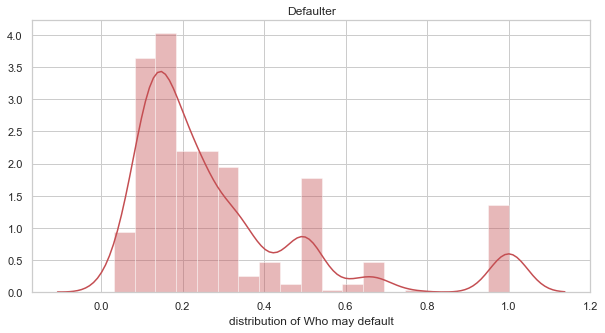

In [574]:
FullyPaidNum("loan_amnt")
chargeOFFNum("loan_amnt")

### In the above distribution we see that peeople who fully paid the loan amount have probability range between 50 to 100 and those who came in defaulter have probabilty 10 to 40 very few have probability greater than 60 percent and came as defaulter

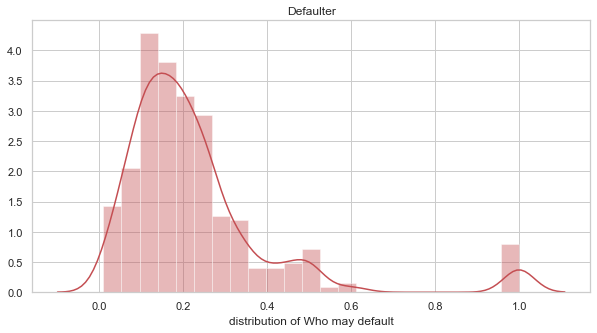

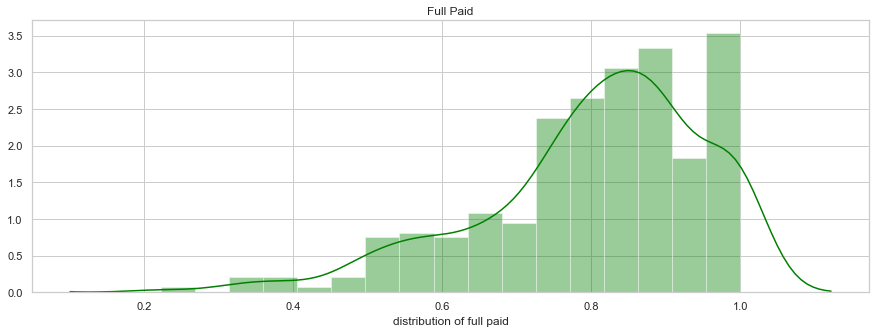

In [419]:
chargeOFFNum("int_rate")
FullyPaidNum("int_rate")

## In above we saw the distribution of interest rate with probability of getting defaulter or Fully paid

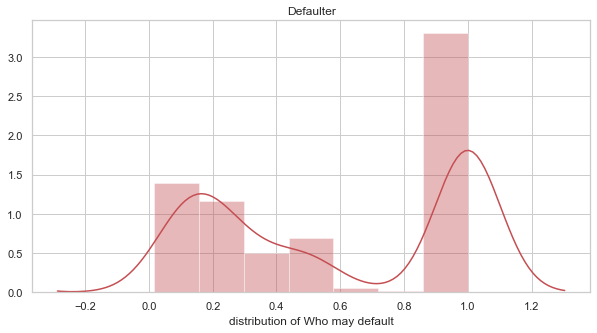

In [420]:
#In this plot we see the distribution annual income with their probability
chargeOFFNum("annual_inc")

### After analysation we came on colclusion that ::-
### The columns which are important for our target Loan status are [loan amount , annual income,interest rate,term,purpose,home ownership , grade,sub grade , employment length,issueMonth]